# Audio to Images Utils
by Wael Radwan

#### Library used to prepare datasets from data
continans various tools to prepare the training dataset and testing dataset

mainly used to randomize files of the dataset
divide the dataset into traininig and testing dataset
randomize the test files

<b> the main idea here is to load the dataset into classified directories then use this utility to create train/test dataset with the randomization </b>

In [6]:
from __future__ import print_function
import os.path
from collections import defaultdict
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import time
%matplotlib notebook

%matplotlib inline
import seaborn
import  scipy

# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

#### Convert audio file to mel spectogram npy
* audio_path : path of the input audio file (.mp3)
* n_mels : number of mels of the output mel spectogram
* mel_path : path to .npy file 

In [10]:
def audio_mel_to_npy(audio_path,n_mels,mel_path):
    # first read the audio file  
    y, sr = librosa.load(audio_path)
    
    # generate .npy file with log mel spectogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    np.save(mel_path, log_S)

#### cut audio into sliding windows of ~5s with ~2-3s intervals. (using .npy files as basis)
Amazingly enough, it took only a couple of minutes for the whole process to finish.

In [40]:
def cut_npy_audio_file(npy_audio_path,feature_dir,out_file_name,interval_size):
    aud_file = np.load(npy_audio_path)
    pointer = 0
    counter = 0
    aud_file_length = aud_file.shape[1]
    while (pointer<aud_file_length):
        counter = counter+1
        result = np.zeros((aud_file.shape[0],interval_size))
        result[:,:aud_file[:,pointer:pointer+interval_size].shape[1]] = aud_file[:,pointer:pointer+interval_size]
        np.save(feature_dir+out_file_name+'_'+str(counter)+'.npy', result)
        pointer = pointer+interval_size 

#### convert .npy file with MEL/MFCC content to image (png)
* filename input file to be converted
* new_file_name new image file name

In [60]:
def conv_npy_audio_to_mel_image(filename,new_file_name):
    fig=plt.figure(figsize=(2, 2))
    song = np.load(filename)
    plt.imshow(song, aspect='auto', interpolation='none', origin='lower')
    fig.savefig(new_file_name,transparent =True)

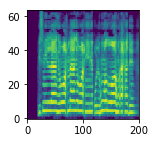

In [61]:
conv_npy_audio_to_mel_image('/ds/dataset/quran/999/999_out_1.npy','2.png')

# TEST AREA

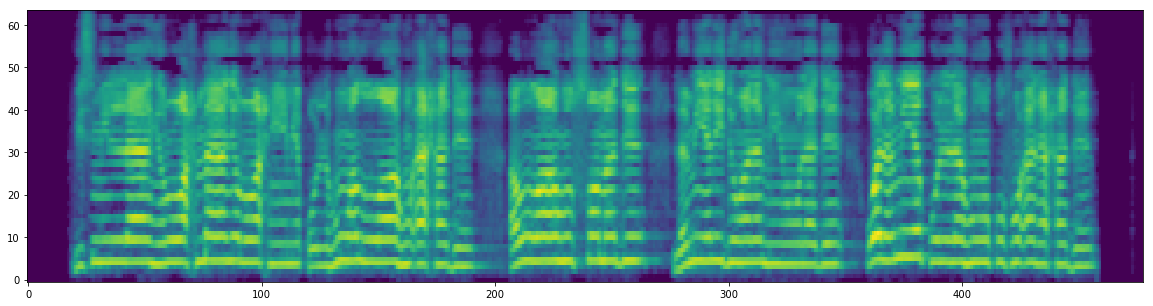

In [47]:
audio_path='/ds/dataset/quran/999/999_0002.mp3'
n_mels=64
mel_npy_path='/ds/dataset/quran/999/mel_999_0002'
feature_dir='/ds/dataset/quran/999/'
audio_mel_to_png(audio_path,n_mels,mel_npy_path)
cut_npy_audio_file(mel_npy_path+'.npy',feature_dir,'999_out',200)
conv_npy_audio_to_mel_image(mel_npy_path+'.npy','999_out.png')